# Sklearn
## Линейные модели в задаче классификации

Рассмотрим линейные модели библиотеки `sklearn` для решения задачи классификации.

### Но для начала вспомним теорию ...

Линейная модель это параметрическая модель. Параметрические методы подразумевают основанную на модели процедуру из двух шагов:   
**Шаг 1.**  Мы делаем предположение, что искомая зависимость имеет определенный вид
$$a(x) = sign(w_0 + w_1x_1 + w_2x_2 + \dots + w_dx_d) = sign(\langle w, x \rangle)$$

$x = (1, x_1, x_2, \dots, x_d)$ - объект (вектор), содержащий d признаков (компонентов),  
$w = (w_0, w_1, w_2, \dots, w_d)$  - весовые коэффициенты (вектор)   
$sign()$ - функция, которая возвращает знак аргумента, например $sign(-20) = -1$
  
**Шаг 2.**  На этом шаге необходимо оценить параметры модели, в данном случае весовые коэффициенты $w_0, w_1, w_2, \dots, w_d$  иначе говоря нам потребуется процедура для подгонки или обучения модели. На этом этапе решается задача оптимизации.
$$Q(w) = \sum_{i=1}^l[M_i < 0] \leq \tilde{Q}(w) = \sum_{i=1}^l \mathcal{L}(M_i(w)) \rightarrow \underset{w}min$$   
$M_i = y_ia(x_i)$ - отступ алгоритма   
$\mathcal{L}(M_i(w))$ - функция потерь

Для борьбы с переобучением используется регуляризация, тогда задача оптимизации примет другой вид:
$$\sum_{i=1}^l \mathcal{L}(M_i(w)) + \gamma\sum_{k=1}^d w_k^2  \rightarrow \underset{w}min \ \ (l_2)$$
или 
$$\sum_{i=1}^l \mathcal{L}(M_i(w)) + \gamma\sum_{k=1}^d |w_k|  \rightarrow \underset{w}min \ \ (l_1)$$
$\gamma$ - коэффициент регуляризации.

В зависимости от вида функции потерь и типа регуляризации различают разные линейные модели.

## Модуль sklearn.linear_model

Линейные модели для задачи классификации:
 - RidgeClassifier
 - LogisticRegression
 - SGDClassifier (SGD - stochastic gradient descent)
 - ...

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.model_selection import StratifiedShuffleSplit

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Генерация данных для задачи классификации

Сгенерируем данные для задачи классификации с помощью `datasets.make_blobs()`. Зададим количество "центров сгущения" (`centers`) и стандартное отклонение (`cluster_std`) "сгустков". По умолчанию количество признаков равно двум, а количество объектов 100.

In [2]:
X, y = datasets.make_blobs(centers=2, cluster_std=3.5, random_state=1)

In [3]:
X.shape

(100, 2)

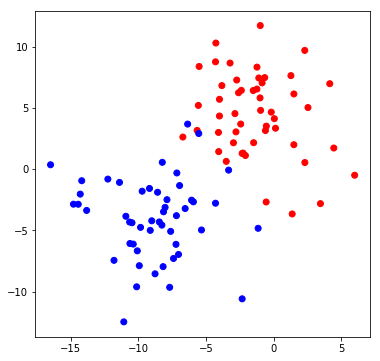

In [4]:
# задаем цвета классов
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

### Разобьем данные на обучение и контроль

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, 
                                                                    test_size=0.3,
                                                                    random_state=42)

In [6]:
train_data.shape

(70, 2)

In [7]:
test_data.shape

(30, 2)

### Линейная классификация

### RidgeClassifier

Гребневая или ридж регрессия для задачи классификации.

### Шаг 1
Cоздание объекта - классификатора

In [8]:
ridge_classifier = linear_model.RidgeClassifier(random_state=42)

### Шаг 2
Обучение классификатора (определение оптимальных параметров). Метод `fit` возвращает обученную модель.

In [9]:
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=42, solver='auto',
        tol=0.001)

### Предсказание на отложенной выборке
Предсказываем с помощью метода `predict`

In [10]:
ridge_predictions = ridge_classifier.predict(test_data)

### Оценка качества алгоритма на отложенной выборке

Посмотрим на результаты и для начала оценим их визуально

In [11]:
print(test_labels)

[1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1]


In [12]:
print(ridge_predictions)

[0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1]


Видно, что алгоритм кое-где ошибается.

Посмотрим на долю правильных ответов

In [13]:
print("Accuracy =", metrics.accuracy_score(test_labels, ridge_predictions))

Accuracy = 0.9333333333333333


В результете обучения алгоритма мы получили коэффициенты:
    $w_1 и \ w_2$

In [14]:
ridge_classifier.coef_

array([[-0.10499163, -0.08943402]])

И $w_0$ (смещение):

In [15]:
ridge_classifier.intercept_

array([-0.55723863])

Аналогично предыдущему описанию. Создадим и обучим модель логистической регрессии.

### LogisticRegression

Функция потерь для этой модели:
    $$\mathcal{L}(M_i) = \log_2(1 + e^{-M_i})$$

Создание модели

In [16]:
log_regressor = linear_model.LogisticRegression(random_state=42)

Обучение

In [17]:
log_regressor.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Предсказание

In [18]:
lr_predictions = log_regressor.predict(test_data)

In [19]:
print(test_labels)

[1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1]


In [20]:
print(lr_predictions)

[1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1]


Другой подход для определения оптимального вектора весов $w$ основан на методе максимального правдоподобия. Такой подход позволяет оценить вероятность принаждежности к классу, поэтому такая модель имеет метод `predict_proba`, который возвращает numpy массив из вероятностей.

In [21]:
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [22]:
print(lr_proba_predictions[:5])

[[0.47974677 0.52025323]
 [0.00671409 0.99328591]
 [0.01774818 0.98225182]
 [0.00825323 0.99174677]
 [0.98614666 0.01385334]]


Один из способов оценить качество принадлежности к классу это площадь под кривой ROC-AUC

In [23]:
print(metrics.roc_auc_score(test_labels, lr_predictions))

1.0


In [24]:
print(metrics.roc_auc_score(test_labels, lr_proba_predictions[:,1]))

1.0


Сравним рассмотренные алгоритмы по доле правильных ответов

Логистическая регрессия

In [25]:
print(metrics.accuracy_score(test_labels, lr_predictions))

1.0


Ридж-классификатор

In [26]:
print(metrics.accuracy_score(test_labels, ridge_predictions))

0.9333333333333333


### Оценка качества по cross-validation (перекрестная проверка)

#### cross_val_score

Перекрестная проверка представляет собой более устойчивый, статистический метод оценки обобщающей способности. Часто используемый вариант перекрестной проверки k-блочная кросс-проверка (k-fold cross-calidation), в которой k - заданное пользователем число (как правило, 5 или 10).

Количество блоков и стратегия кросс-валидации задается с помощью параметра `cv`, а метрика качества, которую мы оцениваем задается параметром `scoring`.

In [27]:
ridge_scoring = cross_val_score(ridge_classifier, X, y, scoring='accuracy', cv=10)

In [28]:
ridge_scoring

array([1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 0.9, 0.9])

In [29]:
lr_scoring = cross_val_score(log_regressor, X, y, scoring='accuracy', cv=10)

In [30]:
lr_scoring

array([0.8, 1. , 1. , 1. , 1. , 1. , 0.8, 1. , 0.9, 0.9])

#### Результаты перекрестной проверки

In [31]:
print('Ridge mean:{:.3f}, max:{}, min:{}, std:{:.3f}'.format(ridge_scoring.mean(), 
                                                        ridge_scoring.max(), 
                                                        ridge_scoring.min(), 
                                                        ridge_scoring.std()))

Ridge mean:0.970, max:1.0, min:0.9, std:0.046


In [32]:
print('Log mean:{:.3f}, max:{}, min:{}, std:{:.3f}'.format(lr_scoring.mean(), 
                                                           lr_scoring.max(), 
                                                           lr_scoring.min(), 
                                                           lr_scoring.std()))

Log mean:0.940, max:1.0, min:0.8, std:0.080


### cross_val_score с заданными scorer и cv_strategy

Мы можем задать свою стратегию разбиения и метрику качества. 

Зададим метрику качества с помощью метода `make_scorer`. Параметр `score_func` определяет функцию оценивающую качество (`greater_is_better=True`) или ошибку (`greater_is_better=False`) модели.

In [33]:
scorer = metrics.make_scorer(score_func=metrics.accuracy_score, greater_is_better=True)

Определим стратегию кросс-валидации. Будем разбивать данные так, чтобы пропорции классов в каждом блоке соответстовали пропорциям классов в наборе данных (Stratified) и были случайно перемешаны (Shuffle).

In [34]:
cv_strategy = StratifiedShuffleSplit(n_splits=20, test_size=0.3, random_state=21)

In [35]:
ridge_scoring = cross_val_score(ridge_classifier, X, y, 
                                scoring=scorer, 
                                cv=cv_strategy)

In [36]:
lr_scoring = cross_val_score(log_regressor, X, y, 
                             scoring=scorer, 
                             cv=cv_strategy)

In [37]:
print('Ridge mean:{:.3f}, max:{:.3f}, min:{:.3f}, std:{:.3f}'.format(ridge_scoring.mean(),
                                                                     ridge_scoring.max(), 
                                                                     ridge_scoring.min(), 
                                                                     ridge_scoring.std()))

Ridge mean:0.973, max:1.000, min:0.900, std:0.029


In [38]:
print('Log mean:{:.3f}, max:{:.3f}, min:{:.3f}, std:{:.3f}'.format(lr_scoring.mean(), 
                                                                   lr_scoring.max(), 
                                                                   lr_scoring.min(), 
                                                                   lr_scoring.std()))

Log mean:0.945, max:1.000, min:0.867, std:0.030
